In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
files = [
    '/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/',
]
variables = [
    'TS-day-1d', #2pm
    'TS-night-1d', #2am
    'TS-12h-1d',
    'TS-0h-1d',
    'TS-13h-1d',
    'TS-1h-1d',
]
nf,nv = len(files),len(variables)

data = []
for i in range(nf):
    for j in range(nv):
        with open(files[i]+variables[j]+'.asc') as f:
            print(files[i]+variables[j]+'.asc')
            data.append(np.loadtxt(f))
data = np.array(data)

nd,ny,nx = 669,32,64
data = data.reshape(nf,nv,nd,ny,nx)
data = np.roll(data, int(nx/2), axis=4)

/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS-day-1d.asc
/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS-night-1d.asc
/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS-12h-1d.asc
/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS-0h-1d.asc
/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS-13h-1d.asc
/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS-1h-1d.asc


In [21]:
#plt.rcParams

config = {
    'axes.labelsize':'medium',
    'axes.titlesize':'large',
    'figure.figsize':[6.*2,4.*2],
    'figure.titlesize':'medium',
    'font.family':['DejaVu Serif'],
    'font.size':10.,
    'savefig.format':'pdf',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'mathtext.fontset':'dejavuserif',
    'mathtext.rm':'DejaVu Serif',
}
plt.rcParams.update(config)

# Check the fonts that I can use
import matplotlib
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
print(fonts)
#STIXGeneral, cmr10, cmb10, Liberation Serif, DejaVu Serif, Nimbus Roman

import matplotlib.colors as colors
cmap='RdBu_r'

{'Quicksand Light', 'cmex10', 'STIXGeneral', 'STIX', 'DejaVu Sans', 'cmmi10', 'Nimbus Mono PS', 'DejaVu Serif Display', 'URW Gothic', 'DejaVu Sans Display', 'Z003', 'Liberation Serif', 'STIXIntegralsUpSm', 'Quicksand Medium', 'STIXIntegralsUpD', 'cmr10', 'STIXIntegralsD', 'cmb10', 'Nimbus Roman', 'D050000L', 'Liberation Sans Narrow', 'STIXSizeFourSym', 'STIXIntegralsUp', 'STIXVariants', 'Standard Symbols PS', 'URW Bookman', 'cmss10', 'Unifont CSUR', 'Noto Sans Mono', 'DejaVu Math TeX Gyre', 'STIXSizeOneSym', 'Nimbus Sans', 'C059', 'Unifont', 'DejaVu Serif', 'STIX Math', 'Liberation Mono', 'cmsy10', 'DejaVu Sans Mono', 'Unifont Upper', 'STIXSizeThreeSym', 'Nimbus Sans Narrow', 'Liberation Sans', 'Noto Mono', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmtt10', 'Quicksand', 'STIXIntegralsSm', 'P052', 'Droid Sans Fallback', 'STIXSizeFiveSym'}


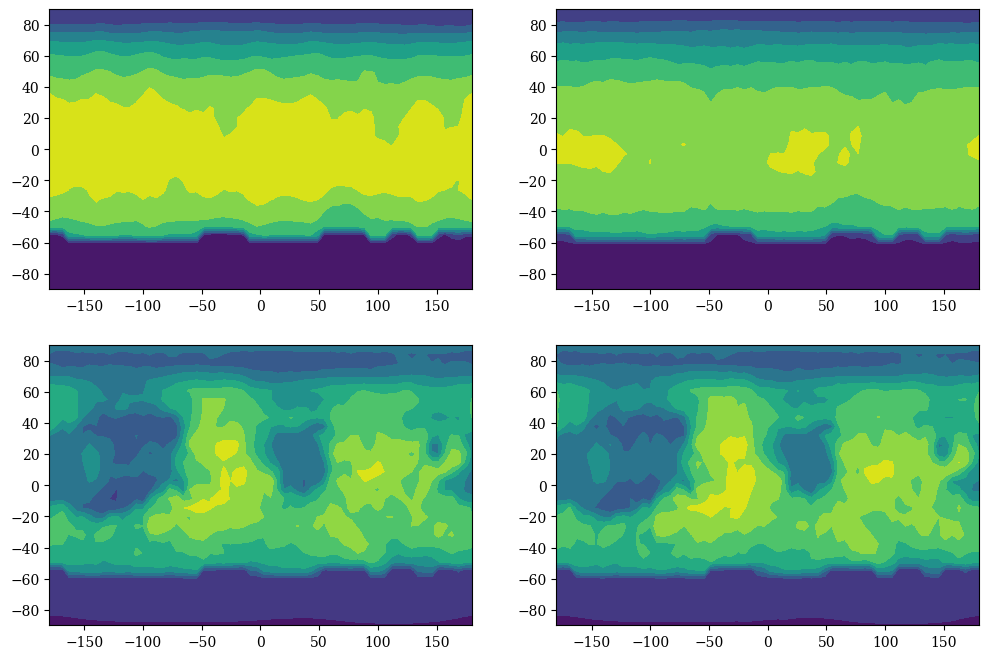

In [ ]:
TS = []
with open('/mnt/dram2/koba/data/MIRAI1k-inactive/Daynight/TS.asc') as f:
    TS.append(np.loadtxt(f))
TS = np.array(TS)
TS = TS.reshape(1,1,669,24,1,32,64)

def localtime_aligner(nf,nv,nd,nt,nz,ny,nx,dat,lat):
    dat_local = np.zeros(nf*nv*nd*nt*nz*ny*nx).reshape(nf,nv,nd,nt,nz,ny,nx)
    j=0
    for i in range(nx):
        if (abs(15*j-lat*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local
TS_local = localtime_aligner(1,1,669,24,1,32,64,TS,5.625)
TS_local_roll = np.roll(TS_local, int(nx/2), axis=6)

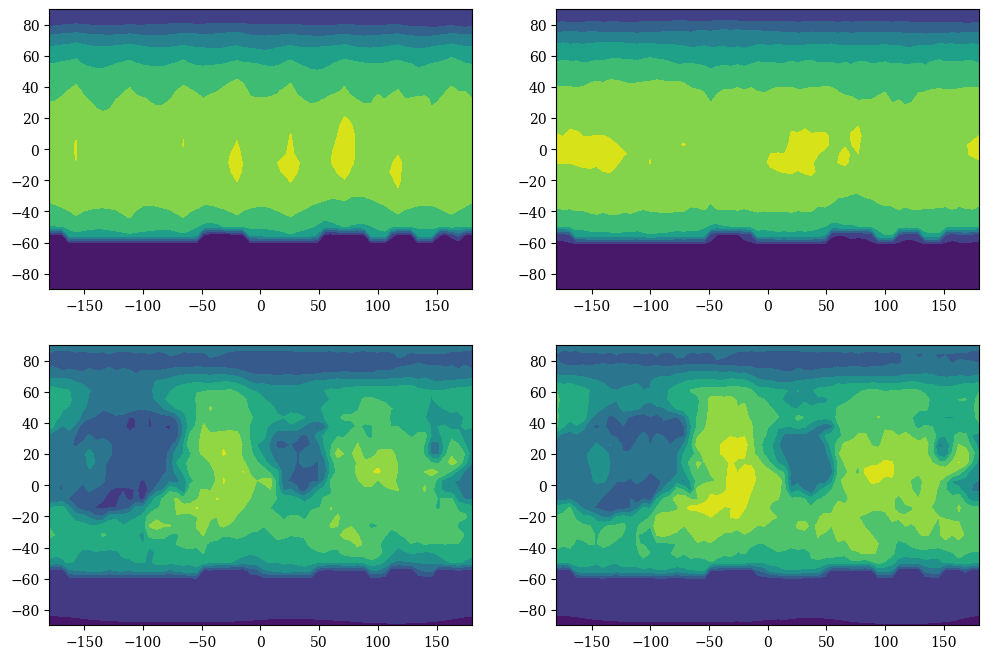

In [28]:
fig,axes = plt.subplots(nrows=2, ncols=2)

longitude = np.linspace(-180,180,64)
latitude = np.linspace(-90,90,32)[::-1]
axes[0,0].contourf(longitude, latitude, data[0,2,371,:,:])
axes[1,0].contourf(longitude, latitude, data[0,3,371,:,:])

axes[0,1].contourf(longitude, latitude, TS_local_roll[0,0,371,12,0,:,:])
axes[1,1].contourf(longitude, latitude, TS_local_roll[0,0,371, 0,0,:,:])

plt.show()

In [4]:
import netCDF4
#nc = netCDF4.Dataset('../TES/NetCDF/TES.MappedClimatology.nadir.MY24.nc', 'r')
#nc = netCDF4.Dataset('../TES/NetCDF/TES.MappedClimatology.nadir.MY25.nc', 'r')
nc = netCDF4.Dataset('TES/NetCDF/TES.MappedClimatology.nadir.MY26.nc', 'r')
#nc = netCDF4.Dataset('../TES/NetCDF/TES.MappedClimatology.nadir.MY27.nc', 'r')
nc.set_auto_mask(False)
print(nc)

variables = [
    'longitude',   #0
    'latitude',    #1
    'altitude',    #2
    'time',        #3
    'tau_dust',    #4
    'tau_ice',     #5
    'water_vapor', #6
    'Psurf_day',   #7
    'Psurf_nit',   #8
    'Tsurf_day',   #9
    'Tsurf_nit',   #10
    'T_nadir_day', #11
    'T_nadir_nit', #12
]
Tsurf_day   = nc.variables[variables[9]][:]
water_vapor = nc.variables[variables[6]][:]
print(water_vapor.shape, '= time, latitude, longitude') # time, latitude, longitude

nx, ny = 64, 32
mx, my = 48, 60
lon = np.linspace(-180,180,nx)
lat = np.linspace(-85.76,85.76,ny)
mlon = np.arange(-180,180.1,360/(mx-1))
mlat = np.arange(-90,90.1,180/(my-1))
#print(lon)
#print(lat)
#print(mlon)
#print(mlat)
xloc = np.zeros(mx)
yloc = np.zeros(my)
for xx in range(mx):
    amin=5.625
    for x in range(nx):
        sub = abs(mlon[xx]-lon[x])
        if (sub < amin):
            amin = sub
            xloc[xx] = x
#print(xloc.shape, xloc)
for yy in range(my):
    amin=5.625
    for y in range(ny):
        sub = abs(mlat[yy]-lat[y])
        if (sub < amin):
            amin = sub
            yloc[yy] = y
#print(yloc.shape, yloc)

#       0, 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12
date = [0,61,126,193,257,317,371,421,468,514,562,612,669]
Ls   = [0,30, 60, 90,120,150,180,210,240,270,300,330,360]
dd = 7

dat1 = np.average(water_vapor[int(Ls[dd]/5):int(Ls[dd]/5)+1,:,:], axis=0)
dat2 = np.zeros(ny*mx).reshape(ny,mx)
aict = np.zeros(ny*mx).reshape(ny,mx)
misout = -1
for yy in range(my):
    for xx in range(mx):
        if (dat1[yy,xx] > misout):
            y = int(yloc[yy])
            aict[y,xx] = aict[y,xx] + 1.
            dat2[y,xx] = dat2[y,xx] + dat1[yy,xx]
for y in range(ny):
    for xx in range(mx):
        if (aict[y,xx] > 0.):
            aict[y,xx] = aict[y,xx]/mx
            dat2[y,xx] = dat2[y,xx]/aict[y,xx]/mx
#            print(dat2[y,xx])
        else:
            dat2[y,xx] = misout
#            print(dat2[y,xx])

dat3 = np.zeros(ny*nx).reshape(ny,nx)
aict = np.zeros(ny*nx).reshape(ny,nx)
misout = -1
for y in range(ny):
    for xx in range(mx):
        if (dat2[y,xx] > misout):
            x = int(xloc[xx])
#            print(x)
            aict[y,x] = aict[y,x] + 1.
            dat3[y,x] = dat3[y,x] + dat2[y,xx]
for y in range(ny):
    for x in range(nx):
        if (aict[y,x] > 0.):
            aict[y,x] = aict[y,x]/ny
            dat3[y,x] = dat3[y,x]/aict[y,x]/ny
#            print(dat3[y,x])
        elif (x < 63):
            dat3[y,x] = (dat3[y,x-1]+dat3[y,x+1])*0.5
#            print(dat3[y,x])
        else: 
            dat3[y,x] = (dat3[y,x-1]+dat3[y,0])*0.5

x, y = np.meshgrid(lon, lat)
X, Y = np.meshgrid(mlon, mlat)

#wv_TES_Ls150 = dat3/(data[0,1,date[dd],:,:]*1e2/610)
#wv_TES_Ls180 = dat3/(data[0,1,date[dd],:,:]*1e2/610)
wv_TES_Ls210 = dat3/(data[0,1,date[dd],:,:]*1e2/610)

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Data for Mars Year 26, from file TES.MappedClimatology.nadir
    dimensions(sizes): longitude(48), latitude(60), altitude(21), time(72)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float32 altitude(altitude), float32 time(time), float32 tau_dust(time, latitude, longitude), float32 tau_ice(time, latitude, longitude), float32 water_vapor(time, latitude, longitude), float32 Psurf_day(time, latitude, longitude), float32 Psurf_nit(time, latitude, longitude), float32 Tsurf_day(time, latitude, longitude), float32 Tsurf_nit(time, latitude, longitude), float32 T_nadir_day(time, altitude, latitude, longitude), float32 T_nadir_nit(time, altitude, latitude, longitude)
    groups: 
(72, 60, 48) = time, latitude, longitude


k,j,i =  0 0 0
k,j,i =  1 0 1
k,j,i =  0 1 2
k,j,i =  1 1 3
k,j,i =  0 2 4
k,j,i =  1 2 5


NameError: name 'wv_TES_Ls150' is not defined

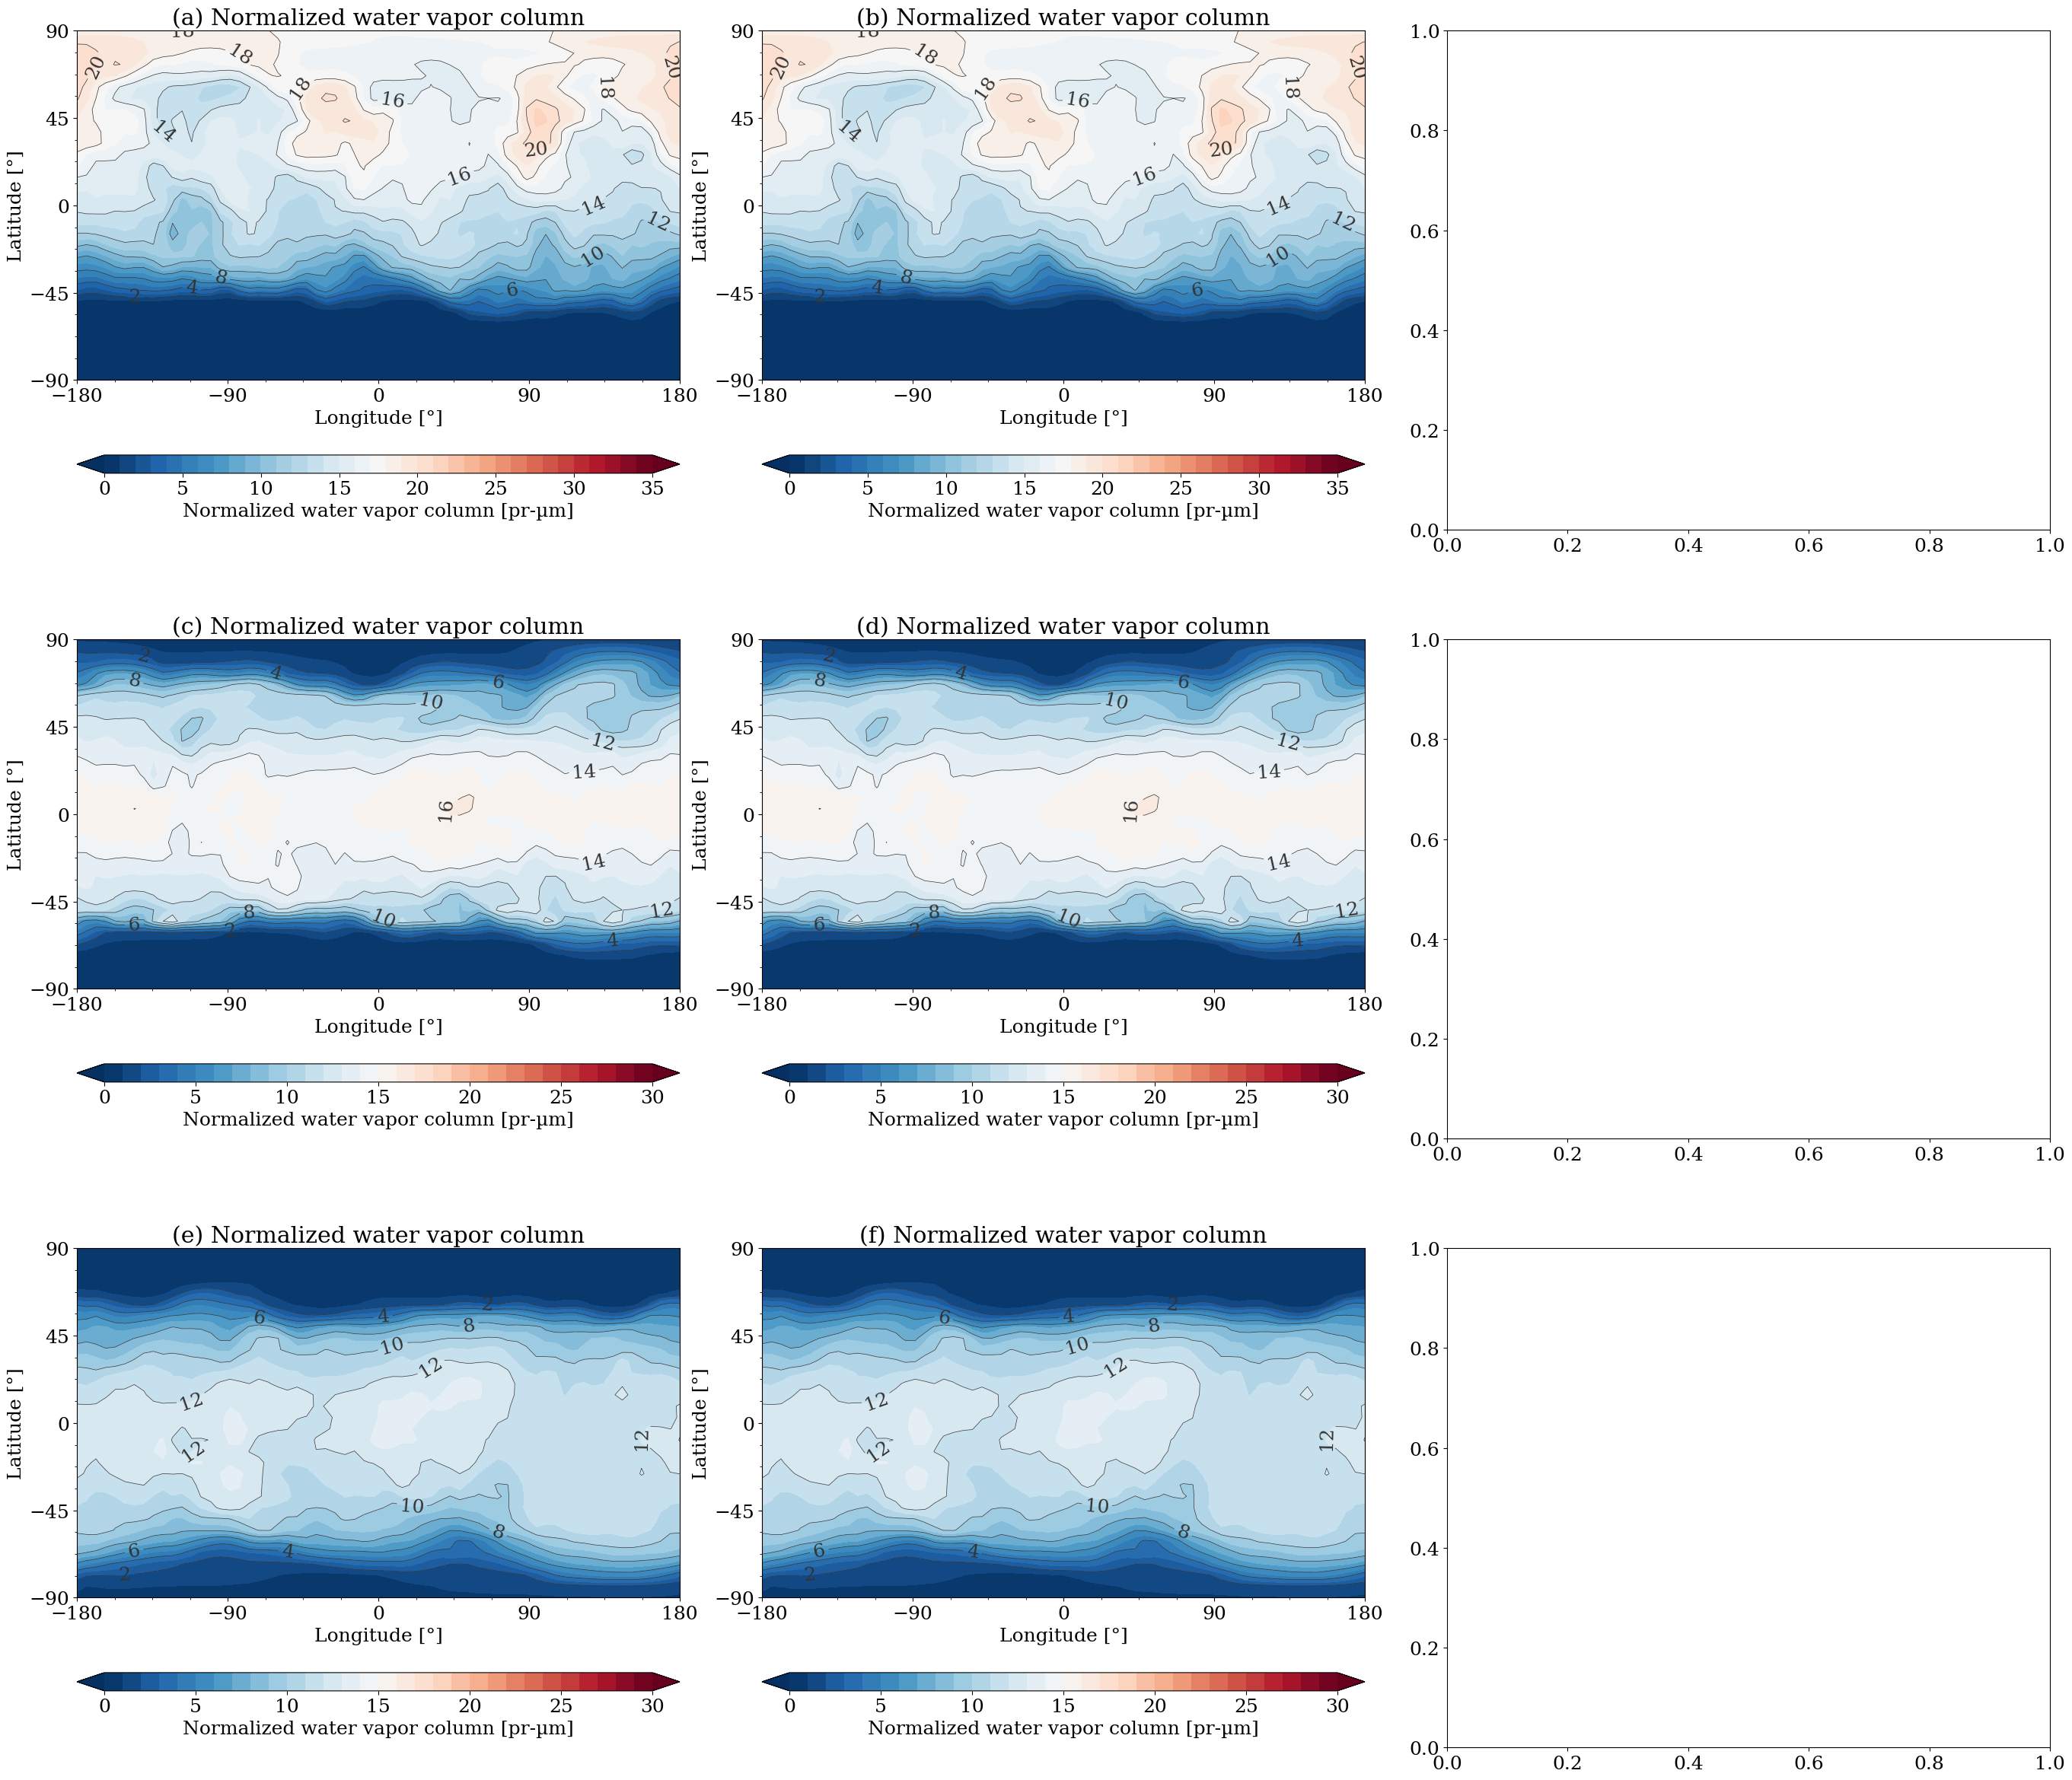

In [5]:
fig = plt.figure()
ncol,nrow,ep = 2,3,1/20
ax1 = fig.add_axes((0/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='b')
ax2 = fig.add_axes((1/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='g')
ax3 = fig.add_axes((2/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='w')
ax4 = fig.add_axes((0/ncol-ep,1/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='c')
ax5 = fig.add_axes((1/ncol-ep,1/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='b')
ax6 = fig.add_axes((2/ncol-ep,1/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='w')
ax7 = fig.add_axes((0/ncol-ep,0/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='r')
ax8 = fig.add_axes((1/ncol-ep,0/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='c')
ax9 = fig.add_axes((2/ncol-ep,0/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='w')

wv = data[:,2,:,:,:]*1e6/(data[:,1,:,:,:]*1e2/610)

longitude = np.linspace(-180,180,64)
latitude = np.linspace(-90,90,32)[::-1]
dates = [317,371,421]
levels = [
    np.arange(0,35.1,1),
    np.arange(0,30.1,1),
    np.arange(0,30.1,1),
]
xticks=np.linspace(-180,180,5)
yticks=np.linspace(-90,90,5)
xlabel='Longitude [°]'
ylabel='Latitude [°]'
titles=[
    '(a) Normalized water vapor column',
    '(b) Normalized water vapor column',
    '(c) Normalized water vapor column',
    '(d) Normalized water vapor column',
    '(e) Normalized water vapor column',
    '(f) Normalized water vapor column',
    '(g) Normalized water vapor column',
    '(h) Normalized water vapor column',
    '(i) Normalized water vapor column',
]
labels=[
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
    'Normalized water vapor column [pr-µm]',
]
factors=[1e6,1e6,1e6]

axes = [ax1,ax2,ax4,ax5,ax7,ax8]
for i in range(len(axes)):
    j=int(i/2) # 0,0,1,1,2,2
    k=i%2 # 0,1,0,1,0,1
    print('k,j,i = ', k,j,i)
    mappable = axes[i].contourf(
        longitude, latitude, wv[k,dates[j],:,:], #data[k,2,dates[j],:,:]*factors[j],
        cmap=cmap, extend='both',
        levels=levels[j]
    )
    plt.colorbar(
        mappable, 
        ax=axes[i], orientation='h', aspect=30,
        ticks=levels[j][::5]
    ).set_label(labels[i])
    cs = axes[i].contour(
        mappable,
        colors='0.2', linewidths=0.5,
        levels=levels[j][::2]
    )
    axes[i].clabel(cs, fmt='%1.0f')
    axes[i].set_xticks(xticks)
    axes[i].set_yticks(yticks)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(titles[i])
    axes[i].minorticks_on()

axes = [ax3,ax6,ax9]
data_TES = [wv_TES_Ls150,wv_TES_Ls180,wv_TES_Ls210]
for i in range(len(axes)):
    j=i
    mappable = axes[i].contourf(
        x, y, data_TES[i], 
        cmap=cmap, extend='both',
        levels=levels[j]
    )
    plt.colorbar(
        mappable, 
        ax=axes[i], orientation='h', aspect=30,
        ticks=levels[j][::5]
    ).set_label(labels[i])
    cs = axes[i].contour(
        mappable,
        colors='0.2', linewidths=0.5,
        levels=levels[j][::2]
    )
    axes[i].clabel(cs, fmt='%1.0f')
    axes[i].set_xticks(xticks)
    axes[i].set_yticks(yticks)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(titles[i])
    axes[i].minorticks_on()

plt.show()

In [41]:
def localtime_aligner(nf,nv,nd,nt,nz,ny,nx,dat,lat):
    dat_local = np.zeros(nf*nv*nd*nt*nz*ny*nx).reshape(nf,nv,nd,nt,nz,ny,nx)
    j=0
    for i in range(nx):
        if (abs(15*j-lat*i) < 7.5):
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
        else:
            j=j+1
            dat_local[:,:,:,:,:,:,i] = np.roll(dat[:,:,:,:,:,:,i], -24+j, axis=3)
    return dat_local

In [ ]:
#ny=32
#nd=223
#nn=1
#my=32
#md=72
#data_zm = np.average(data_roll, axis=6)
#print(data_zm.shape)
#idata = data_zm[0, :, ::3, 12, 0, :].reshape(nd*ny*nn)
#idata = idata.reshape(nd,ny,nn)
ls = [
      0.250,   0.761,   1.270,   1.779,   2.286,   2.793,   3.299,
      3.804,   4.309,   4.812,   5.315,   5.817,   6.319,   6.819,
      7.319,   7.818,   8.316,   8.814,   9.311,   9.807,  10.302,
     10.797,  11.291,  11.784,  12.277,  12.768,  13.260,  13.750,
     14.240,  14.729,  15.217,  15.705,  16.192,  16.679,  17.165,
     17.650,  18.134,  18.618,  19.102,  19.584,  20.066,  20.548,
     21.029,  21.509,  21.988,  22.468,  22.946,  23.424,  23.901,
     24.378,  24.854,  25.330,  25.805,  26.279,  26.753,  27.227,
     27.700,  28.172,  28.644,  29.115,  29.586,  30.057,  30.526,
     30.996,  31.465,  31.933,  32.401,  32.868,  33.335,  33.802,
     34.268,  34.734,  35.199,  35.664,  36.128,  36.592,  37.055,
     37.518,  37.981,  38.443,  38.905,  39.367,  39.828,  40.288,
     40.749,  41.209,  41.668,  42.127,  42.586,  43.045,  43.503,
     43.961,  44.418,  44.875,  45.332,  45.789,  46.245,  46.701,
     47.157,  47.612,  48.067,  48.522,  48.976,  49.430,  49.884,
     50.338,  50.792,  51.245,  51.698,  52.150,  52.603,  53.055,
     53.507,  53.959,  54.411,  54.862,  55.313,  55.764,  56.215,
     56.666,  57.116,  57.567,  58.017,  58.467,  58.917,  59.367,
     59.816,  60.266,  60.715,  61.164,  61.613,  62.062,  62.511,
     62.960,  63.409,  63.857,  64.306,  64.754,  65.203,  65.651,
     66.099,  66.547,  66.995,  67.444,  67.892,  68.340,  68.788,
     69.236,  69.684,  70.132,  70.580,  71.028,  71.476,  71.924,
     72.372,  72.820,  73.268,  73.717,  74.165,  74.613,  75.062,
     75.510,  75.958,  76.407,  76.856,  77.304,  77.753,  78.202,
     78.651,  79.100,  79.550,  79.999,  80.449,  80.898,  81.348,
     81.798,  82.248,  82.698,  83.149,  83.599,  84.050,  84.501,
     84.952,  85.404,  85.855,  86.307,  86.759,  87.211,  87.664,
     88.116,  88.569,  89.022,  89.475,  89.929,  90.383,  90.837,
     91.291,  91.746,  92.201,  92.656,  93.112,  93.568,  94.024,
     94.480,  94.937,  95.394,  95.851,  96.309,  96.767,  97.225,
     97.684,  98.143,  98.602,  99.062,  99.522,  99.983, 100.440,
    100.910, 101.370, 101.830, 102.290, 102.750, 103.220, 103.680,
    104.150, 104.610, 105.080, 105.540, 106.010, 106.470, 106.940,
    107.410, 107.870, 108.340, 108.810, 109.280, 109.750, 110.220,
    110.690, 111.160, 111.630, 112.110, 112.580, 113.050, 113.530,
    114.000, 114.470, 114.950, 115.430, 115.900, 116.380, 116.860,
    117.340, 117.810, 118.290, 118.770, 119.250, 119.740, 120.220,
    120.700, 121.180, 121.670, 122.150, 122.640, 123.120, 123.610,
    124.090, 124.580, 125.070, 125.560, 126.050, 126.540, 127.030,
    127.520, 128.010, 128.510, 129.000, 129.490, 129.990, 130.490,
    130.980, 131.480, 131.980, 132.480, 132.980, 133.480, 133.980,
    134.480, 134.980, 135.480, 135.990, 136.490, 137.000, 137.510,
    138.010, 138.520, 139.030, 139.540, 140.050, 140.560, 141.070,
    141.590, 142.100, 142.610, 143.130, 143.650, 144.160, 144.680,
    145.200, 145.720, 146.240, 146.760, 147.280, 147.810, 148.330,
    148.860, 149.380, 149.910, 150.440, 150.970, 151.500, 152.030,
    152.560, 153.090, 153.620, 154.160, 154.690, 155.230, 155.770,
    156.300, 156.840, 157.380, 157.920, 158.470, 159.010, 159.550,
    160.100, 160.640, 161.190, 161.740, 162.290, 162.840, 163.390,
    163.940, 164.490, 165.040, 165.600, 166.150, 166.710, 167.270,
    167.830, 168.390, 168.950, 169.510, 170.070, 170.630, 171.200,
    171.770, 172.330, 172.900, 173.470, 174.040, 174.610, 175.180,
    175.750, 176.330, 176.900, 177.480, 178.050, 178.630, 179.210,
    179.790, 180.370, 180.950, 181.540, 182.120, 182.700, 183.290,
    183.880, 184.470, 185.050, 185.640, 186.230, 186.830, 187.420,
    188.010, 188.610, 189.200, 189.800, 190.400, 191.000, 191.600,
    192.200, 192.800, 193.400, 194.000, 194.610, 195.210, 195.820,
    196.430, 197.030, 197.640, 198.250, 198.860, 199.480, 200.090,
    200.700, 201.320, 201.930, 202.550, 203.160, 203.780, 204.400,
    205.020, 205.640, 206.260, 206.880, 207.510, 208.130, 208.750,
    209.380, 210.000, 210.630, 211.260, 211.890, 212.520, 213.150,
    213.780, 214.410, 215.040, 215.670, 216.300, 216.940, 217.570,
    218.210, 218.840, 219.480, 220.110, 220.750, 221.390, 222.030,
    222.670, 223.310, 223.950, 224.590, 225.230, 225.870, 226.520,
    227.160, 227.800, 228.450, 229.090, 229.740, 230.380, 231.030,
    231.670, 232.320, 232.960, 233.610, 234.260, 234.910, 235.550,
    236.200, 236.850, 237.500, 238.150, 238.800, 239.450, 240.100,
    240.750, 241.400, 242.050, 242.700, 243.350, 244.000, 244.650,
    245.310, 245.960, 246.610, 247.260, 247.910, 248.560, 249.210,
    249.870, 250.520, 251.170, 251.820, 252.470, 253.120, 253.780,
    254.430, 255.080, 255.730, 256.380, 257.030, 257.680, 258.330,
    258.980, 259.630, 260.280, 260.930, 261.580, 262.230, 262.880,
    263.530, 264.180, 264.830, 265.480, 266.120, 266.770, 267.420,
    268.060, 268.710, 269.350, 270.000, 270.650, 271.290, 271.930,
    272.580, 273.220, 273.860, 274.510, 275.150, 275.790, 276.430,
    277.070, 277.710, 278.350, 278.990, 279.620, 280.260, 280.900,
    281.530, 282.170, 282.800, 283.440, 284.070, 284.700, 285.330,
    285.970, 286.600, 287.230, 287.850, 288.480, 289.110, 289.740,
    290.360, 290.990, 291.610, 292.240, 292.860, 293.480, 294.100,
    294.730, 295.340, 295.960, 296.580, 297.200, 297.820, 298.430,
    299.050, 299.660, 300.270, 300.880, 301.500, 302.100, 302.710,
    303.330, 303.930, 304.540, 305.140, 305.750, 306.350, 306.950,
    307.560, 308.160, 308.760, 309.360, 309.950, 310.550, 311.150,
    311.740, 312.340, 312.930, 313.520, 314.110, 314.700, 315.290,
    315.880, 316.470, 317.050, 317.640, 318.220, 318.810, 319.390,
    319.970, 320.550, 321.130, 321.710, 322.290, 322.860, 323.440,
    324.010, 324.580, 325.160, 325.730, 326.300, 326.870, 327.430,
    328.000, 328.570, 329.130, 329.700, 330.260, 330.820, 331.380,
    331.940, 332.500, 333.060, 333.620, 334.170, 334.730, 335.280,
    335.840, 336.390, 336.940, 337.490, 338.040, 338.590, 339.130,
    339.680, 340.220, 340.770, 341.310, 341.850, 342.390, 342.940,
    343.470, 344.010, 344.550, 345.090, 345.620, 346.160, 346.690,
    347.220, 347.760, 348.290, 348.820, 349.350, 349.870, 350.400,
    350.930, 351.450, 351.980, 352.500, 353.020, 353.550, 354.070,
    354.590, 355.110, 355.620, 356.140, 356.660, 357.170, 357.690,
    358.200, 358.720, 359.230, 359.740
]

def grd2grd_Ls5(ls,ny,nd,nn,my,md,idata):
    mls = np.zeros(md)
    xloc = np.zeros(nd)
    for i in range(md):
        mls[i] = -2.5 + float(i)*5.
    for i in range(nd):
        amin = 5.
        for j in range(md):
            sub = abs(ls[(i+1)*3-2]-mls[j])
            if (sub < amin):
                amin = sub
                xloc[i] = j

    odata = np.zeros(md*my*nn).reshape(md,my,nn)
    aict = np.zeros(md)
    for i in range(nd):
        k = int(xloc[i])
        aict[k] = aict[k] + 1.
        odata[k,:,:] = odata[k,:,:] + idata[i,:,:]
    for j in range(md):
        if(aict[j] > 0.):
            odata[j,:,:] = odata[j,:,:] / aict[j]
        else:
            odata[j,:,:] = misout
    return odata

In [54]:
files = [
    '/mnt/dram2/koba/data/Kobayashi-2025b/t21l32g20-MIRAI1j-active-20250607-adsinhom/Daynight/',
]
variables = [
#    'wflux2s',
#    'U',
#    'V',
    'TS'
]
nf,nv = len(files),len(variables)

data = []
for i in range(nf):
    for j in range(nv):
        with open(files[i]+variables[j]+'.asc') as f:
            print(files[i]+variables[j]+'.asc')
            data.append(np.loadtxt(f))
data = np.array(data)

nd,nt,nz,ny,nx = 669,24,1,32,64
data = data.reshape(nf,nv,nd,nt,nz,ny,nx)
print(data.shape)

data_local = localtime_aligner(nf,nv,nd,nt,nz,ny,nx,data,5.625)
print(data_local.shape)

data_roll = np.roll(data_local, int(nx/2), axis=6)
print(data_roll.shape)

/mnt/dram2/koba/data/Kobayashi-2025b/t21l32g20-MIRAI1j-active-20250607-adsinhom/Daynight/TS.asc
(1, 1, 669, 24, 1, 32, 64)
(1, 1, 669, 24, 1, 32, 64)
(1, 1, 669, 24, 1, 32, 64)


0 0 0
1 0 1
2 0 2


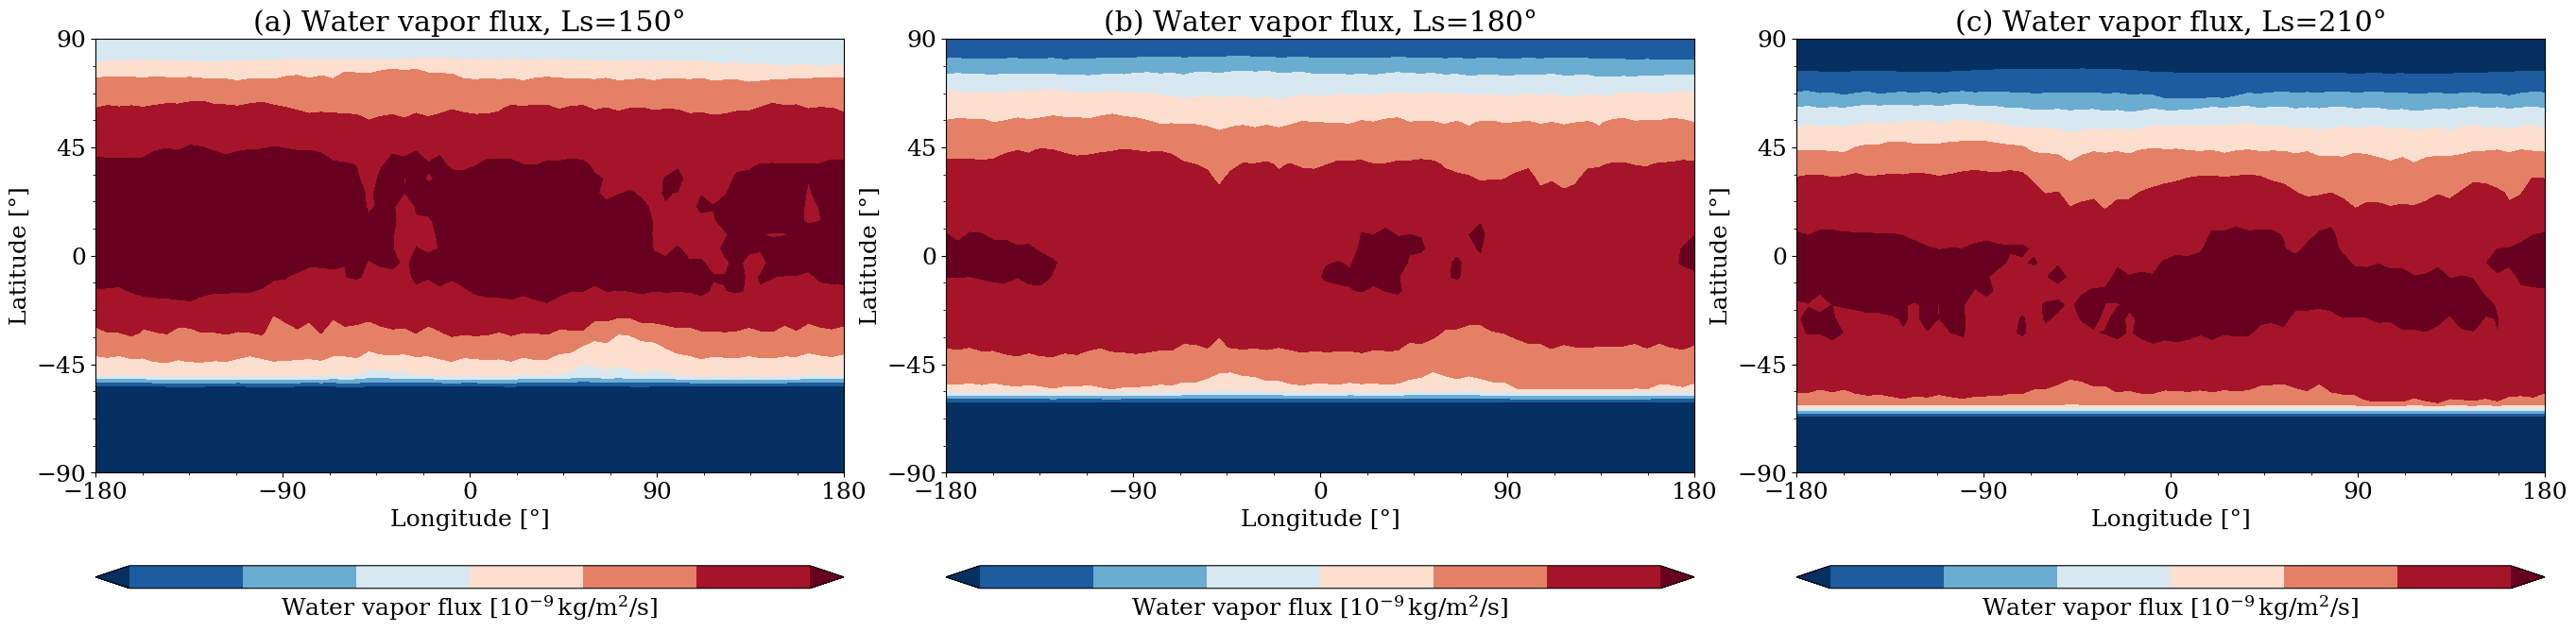

In [101]:
fig = plt.figure()
ncol,nrow,ep = 2,3,1/20
ax1 = fig.add_axes((0/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='b')
ax2 = fig.add_axes((1/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='g')
ax3 = fig.add_axes((2/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='r')

longitude = np.linspace(-180,180,64)
latitude = np.linspace(-90,90,32)[::-1]
dates = [317,371,421]
levels = [
    np.arange(-100,100.1,5),
    np.arange(-100,100.1,5),
    np.arange(-100,100.1,5),
]
xticks=np.linspace(-180,180,5)
yticks=np.linspace(-90,90,5)
xlabel='Longitude [°]'
ylabel='Latitude [°]'
titles=[
    '(a) Water vapor flux, Ls=150°',
    '(b) Water vapor flux, Ls=180°',
    '(c) Water vapor flux, Ls=210°',
]
labels=[
    r'Water vapor flux [$10^{-9} \,\rm kg/m^2/s$]',
    r'Water vapor flux [$10^{-9} \,\rm kg/m^2/s$]',
    r'Water vapor flux [$10^{-9} \,\rm kg/m^2/s$]',
]
factors=[1e9,1e9,1e9]

axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    j=int(i/3) # 0,0,0,1,1,1,2,2,2
    k=i%3 # 0,1,2,0,1,2,0,1,2
    print(k,j,i)
    l,m,n=0,0,0
    mappable = axes[i].contourf(
        longitude, latitude, data_roll[l,m,dates[i],12,n,:,:]*factors[j], 
        cmap=cmap, extend='both',
#        levels=levels[j]
    )
    plt.colorbar(
        mappable, 
        ax=axes[i], orientation='h', aspect=30,
        ticks=levels[j][::5]
    ).set_label(labels[i])
    cs = axes[i].contour(
        mappable,
        colors='0.2', linewidths=0.5,
        levels=levels[j][::2]
    )
    axes[i].clabel(cs, fmt='%1.0f')
    axes[i].set_xticks(xticks)
    axes[i].set_yticks(yticks)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(titles[i])
    axes[i].minorticks_on()

plt.show()

(1, 1, 669, 24, 1, 32)
0 0 0
1 0 1


(1, 1, 669, 1, 32)


TypeError: Length of x must be number of columns in z.

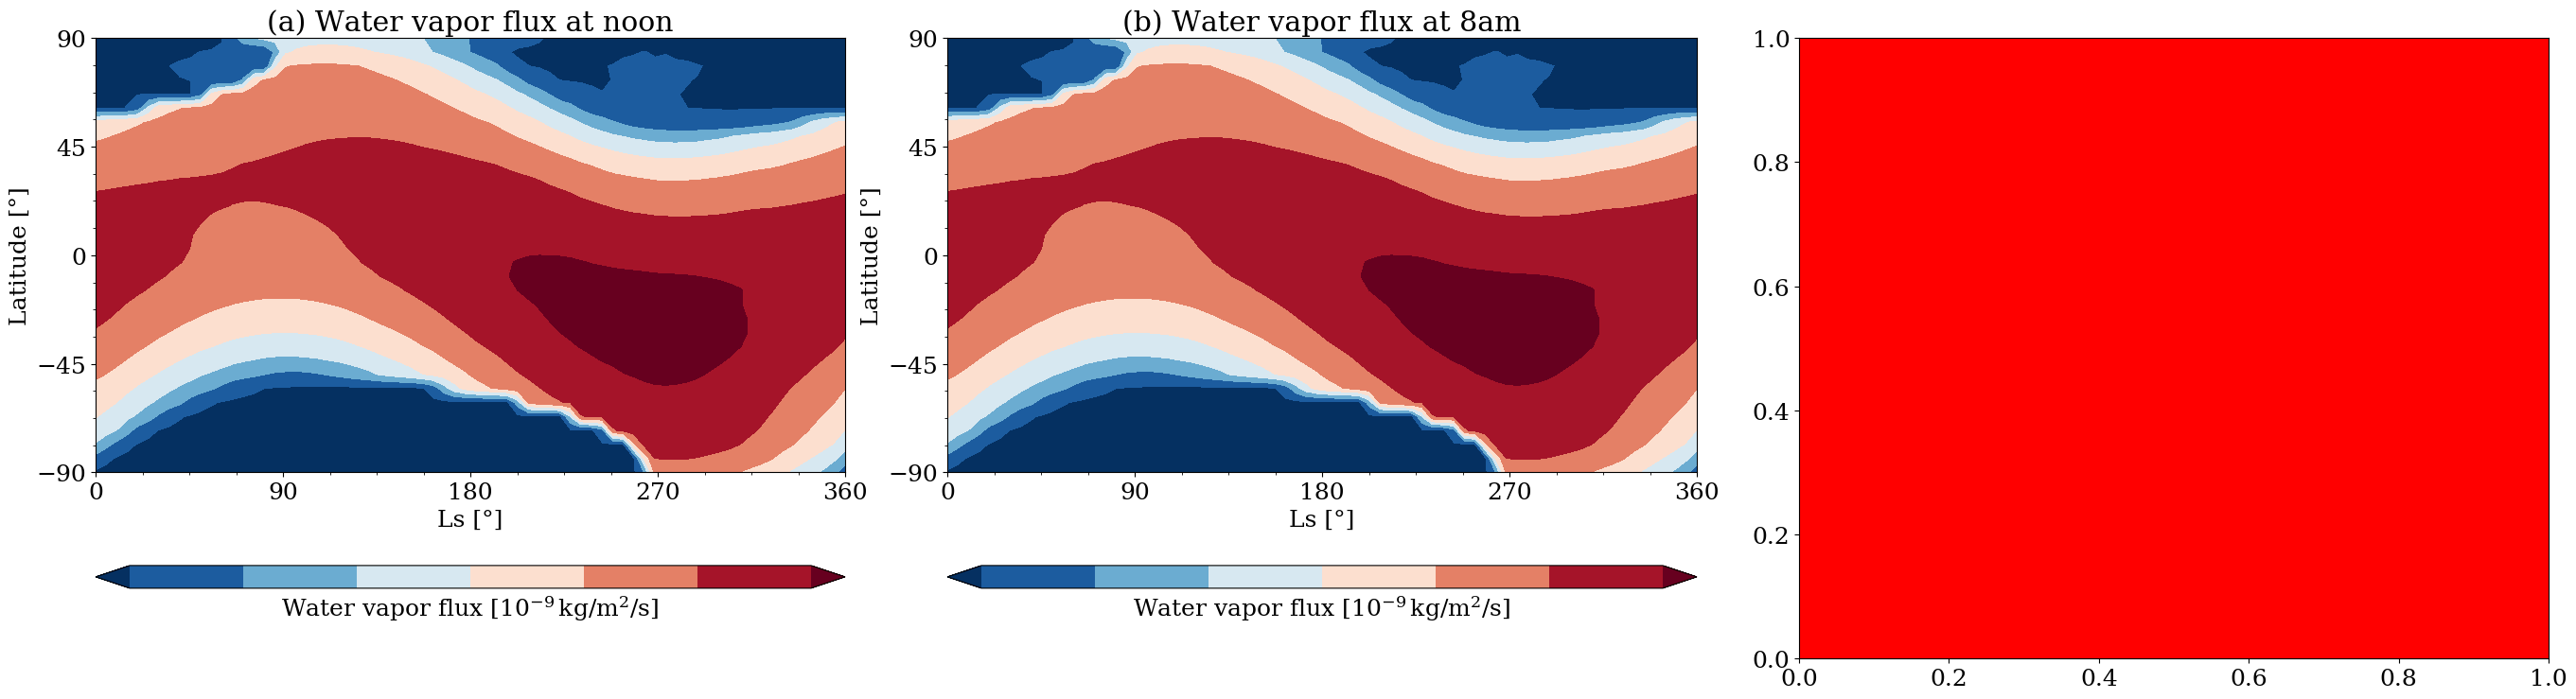

In [102]:
fig = plt.figure()
ncol,nrow,ep = 2,3,1/20
ax1 = fig.add_axes((0/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='b')
ax2 = fig.add_axes((1/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='g')
ax3 = fig.add_axes((2/ncol-ep,2/nrow-ep,1/ncol-1.2*ep,1/nrow-1.2*ep), facecolor='r')

Ls = np.linspace(0,360,669)
Ls = np.linspace(0,360,72)
latitude = np.linspace(-90,90,32)[::-1]
dates = [317,371,421]
levels = [
    np.arange(-50,50.1,1),
    np.arange(-50,50.1,1),
    np.arange(-50,50.1,1),
]
xticks=np.linspace(0,360,5)
yticks=np.linspace(-90,90,5)
xlabel='Ls [°]'
ylabel='Latitude [°]'
titles=[
    '(a) Water vapor flux at noon',
    '(b) Water vapor flux at 8am',
    '(c) Water vapor flux, diurnal mean',
]
labels=[
    r'Water vapor flux [$10^{-9} \,\rm kg/m^2/s$]',
    r'Water vapor flux [$10^{-9} \,\rm kg/m^2/s$]',
    r'Water vapor flux [$10^{-9} \,\rm kg/m^2/s$]',
]
factors=[1e9,1e9,1e9]

data_zm = np.average(data_roll, axis=6)
print(data_zm.shape)
#velocity = np.sqrt(data_roll[:,1,:,:,:,:,:]**2 + data_roll[:,2,:,:,:,:,:]**2)
#velocity_zm = np.average(velocity, axis=5)

times = [12,8]

axes = [ax1,ax2]
for i in range(len(axes)):
    j=int(i/2) # 0,0,0,1,1,1,2,2,2
    k=i%2 # 0,1,2,0,1,2,0,1,2
    print(k,j,i)
    mappable = axes[i].contourf(
        Ls, latitude, odata[:,:,0].T*factors[j], 
        cmap=cmap, extend='both',
#        levels=levels[j]
    )
    plt.colorbar(
        mappable, 
        ax=axes[i], orientation='h', aspect=30,
        ticks=levels[j][::5]
    ).set_label(labels[i])
#    cs = axes[i].contour(
#        Ls, latitude, velocity_zm[0,:,times[i],0,:].T,
#        colors='0.2', linewidths=1,
#        levels=np.arange(10,20,2)
#    )
    axes[i].clabel(cs, fmt='%1.0f')
    axes[i].set_xticks(xticks)
    axes[i].set_yticks(yticks)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].set_title(titles[i])
    axes[i].minorticks_on()

data_avr = np.average(data_roll, axis=3)
data_zm = np.average(data_avr, axis=5)
print(data_zm.shape)
#velocity = np.sqrt(data_avr[:,1,:,:,:,:]**2 + data_avr[:,2,:,:,:,:]**2)
#velocity_zm = np.average(velocity, axis=4)
#print(velocity_zm.shape)

mappable = ax3.contourf(
    Ls, latitude, data_zm[0,0,:,0,:].T*factors[j], 
    cmap=cmap, extend='both',
    levels=levels[j]
)
plt.colorbar(
    mappable, 
    ax=ax3, orientation='h', aspect=30,
    ticks=levels[j][::5]
).set_label(labels[i])
#cs = ax3.contour(
#    Ls, latitude, velocity_zm[0,:,0,:].T,
#    colors='0.2', linewidths=1,
#    levels=np.arange(10,20,2)
#)
ax3.clabel(cs, fmt='%1.0f')
ax3.set_xticks(xticks)
ax3.set_yticks(yticks)
ax3.set_xlabel(xlabel)
ax3.set_ylabel(ylabel)
ax3.set_title(titles[i])
ax3.minorticks_on()

plt.show()